In [1]:
!pip install pandas
!pip install matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV
df = pd.read_csv("GPU_DATA.csv")

# Axis Label
df["LABEL"] = df["YEAR"].astype(str) + " - " + df["GPU"]

# TDP per transistor
df["TDP_PER_TRANSISTOR"] = df["TDP_MAX"] / df["TRANSISTOR_COUNT"]


ModuleNotFoundError: No module named 'pandas'

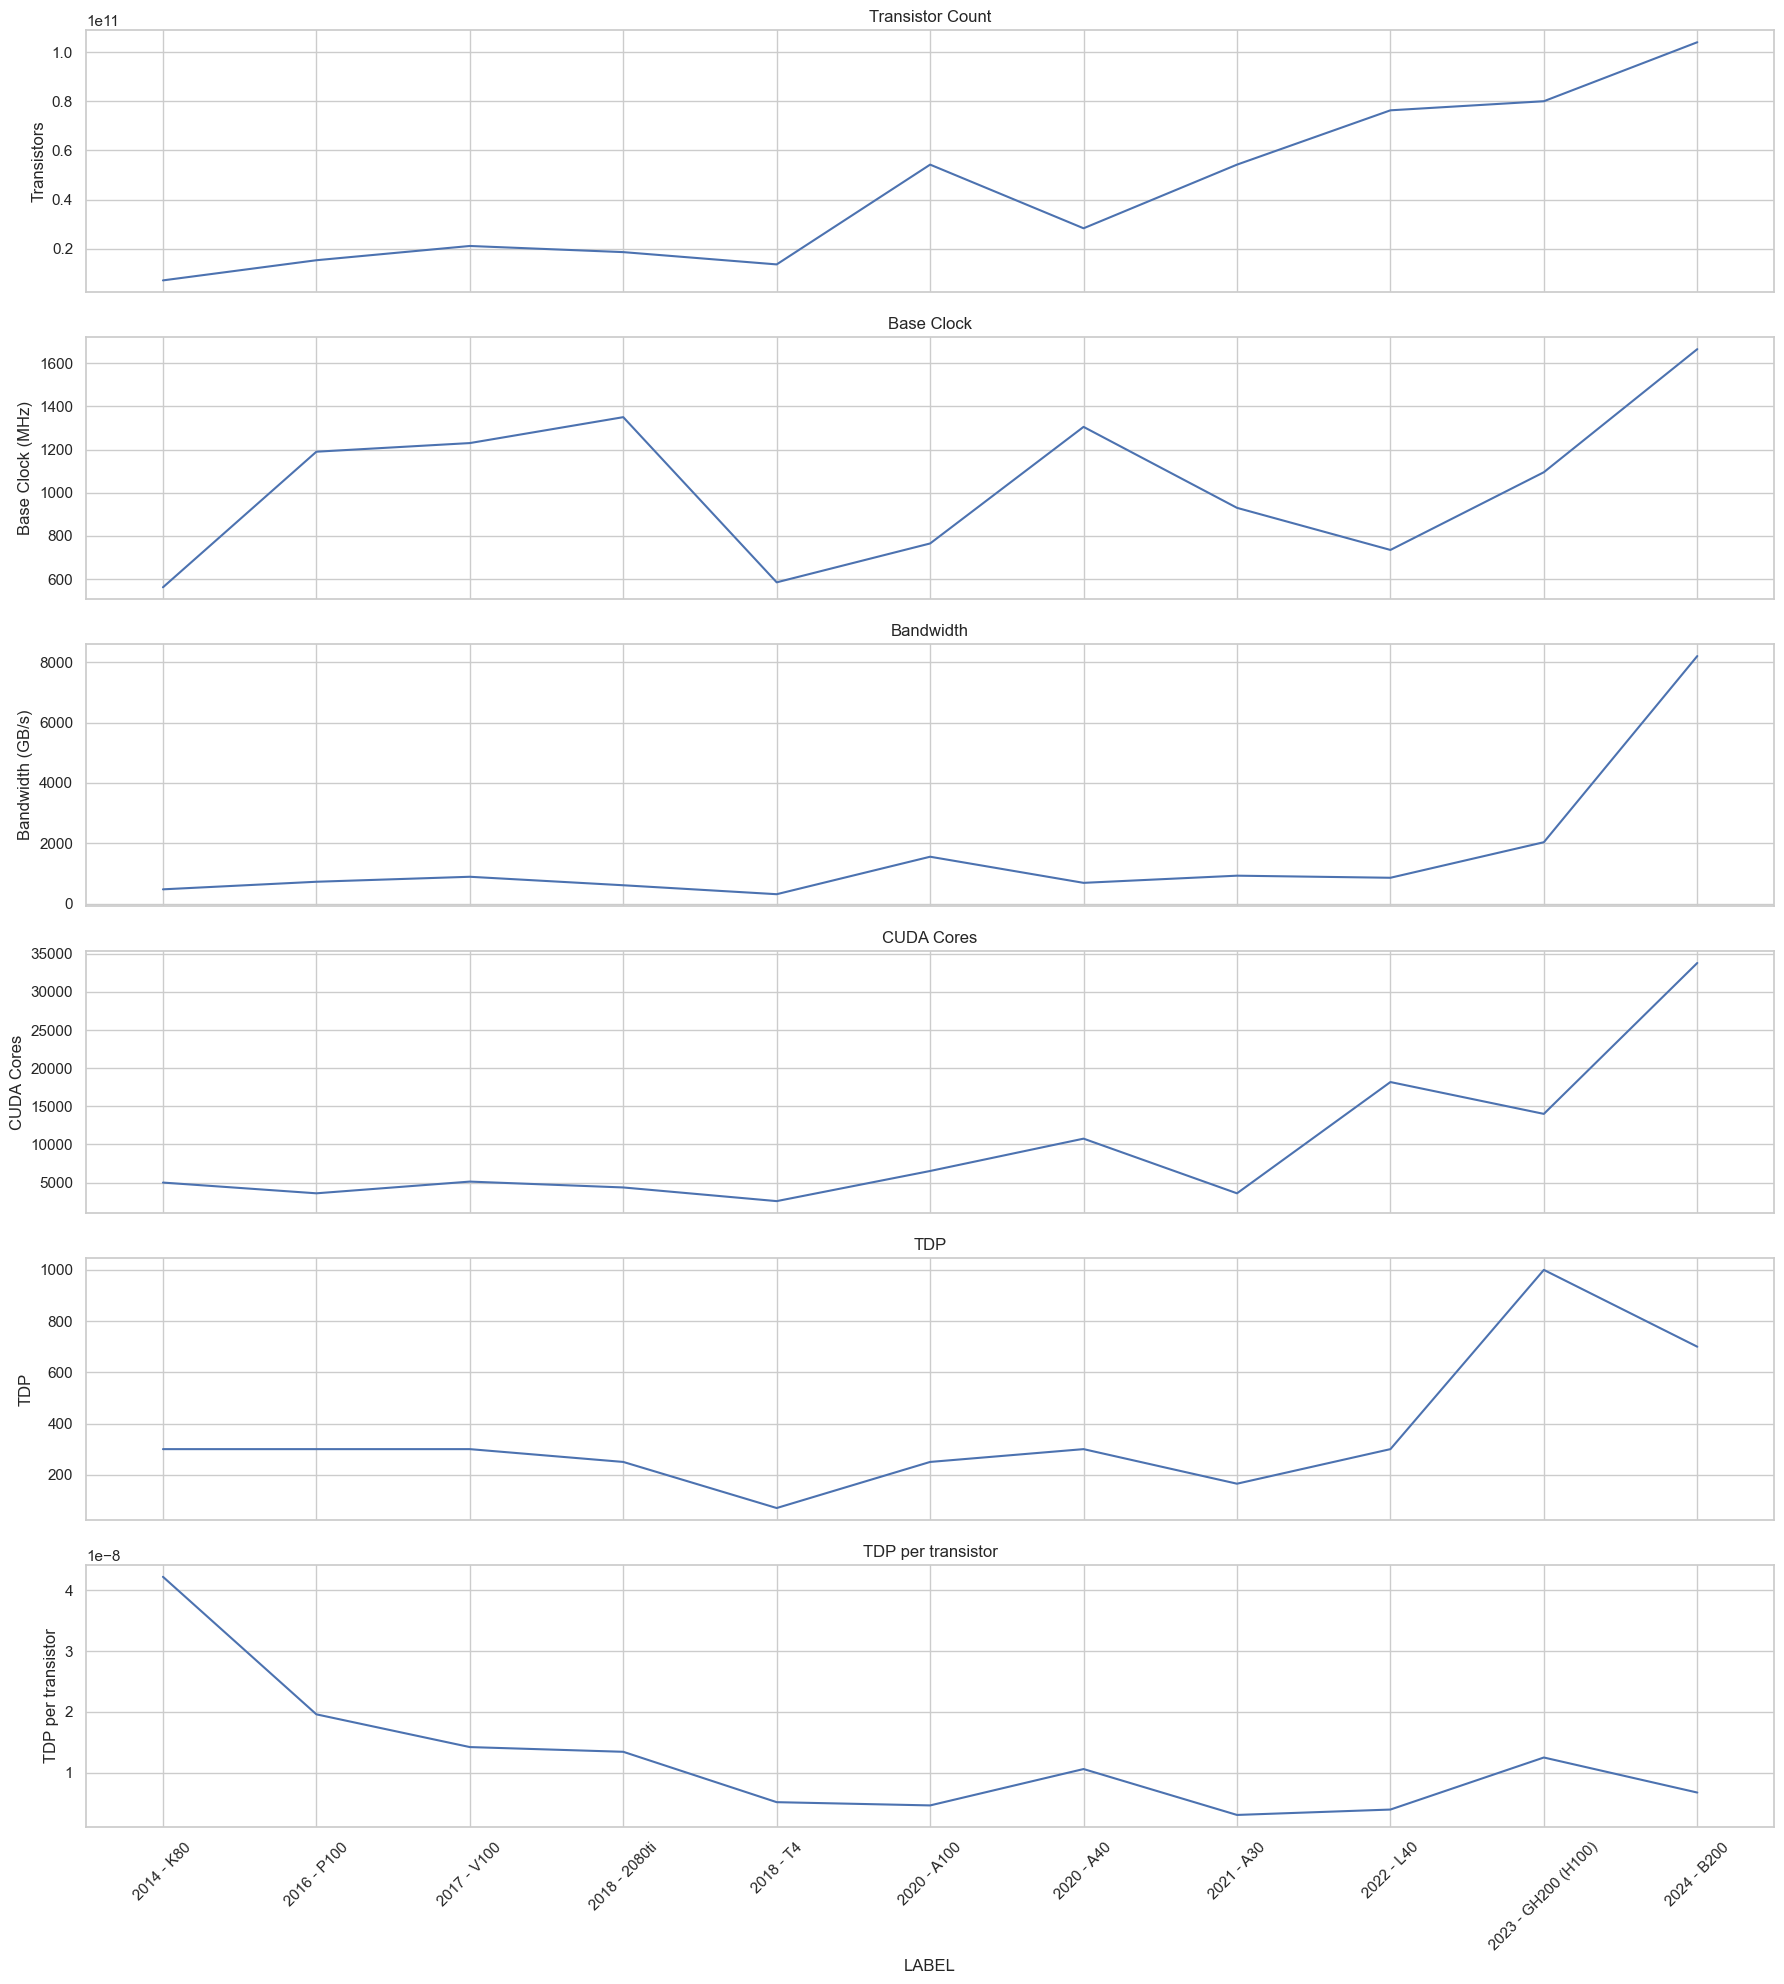

In [ ]:
# Sort by year
df_sorted = df.sort_values("YEAR")

# Set style
sns.set(style="whitegrid")

# Create figure with 4 subplots
fig, axes = plt.subplots(6, 1, figsize=(18, 20), sharex=True)

# Plot 1: Transistor Count
sns.lineplot(data=df_sorted, x="LABEL", y="TRANSISTOR_COUNT", ax=axes[0])
axes[0].set_title("Transistor Count")
axes[0].set_ylabel("Transistors")

# Plot 2: Base Clock
sns.lineplot(data=df_sorted, x="LABEL", y="BASE_CLOCK", ax=axes[1])
axes[1].set_title("Base Clock")
axes[1].set_ylabel("Base Clock (MHz)")

# Plot 3: Bandwidth
sns.lineplot(data=df_sorted, x="LABEL", y="BANDWIDTH", ax=axes[2])
axes[2].set_title("Bandwidth")
axes[2].set_ylabel("Bandwidth (GB/s)")

# Plot 4: CUDA Cores
sns.lineplot(data=df_sorted, x="LABEL", y="CUDA_CORES", ax=axes[3])
axes[3].set_title("CUDA Cores")
axes[3].set_ylabel("CUDA Cores")

# Plot 5: TDP
sns.lineplot(data=df_sorted, x="LABEL", y="TDP_MAX", ax=axes[4])
axes[4].set_title("TDP")
axes[4].set_ylabel("TDP")

# Plot 6: TDP per transistor
sns.lineplot(data=df_sorted, x="LABEL", y="TDP_PER_TRANSISTOR", ax=axes[5])
axes[5].set_title("TDP per transistor")
axes[5].set_ylabel("TDP per transistor")

# Shared x-axis formatting
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

axes[3].set_xlabel("Year - GPU")

plt.tight_layout()
plt.show()


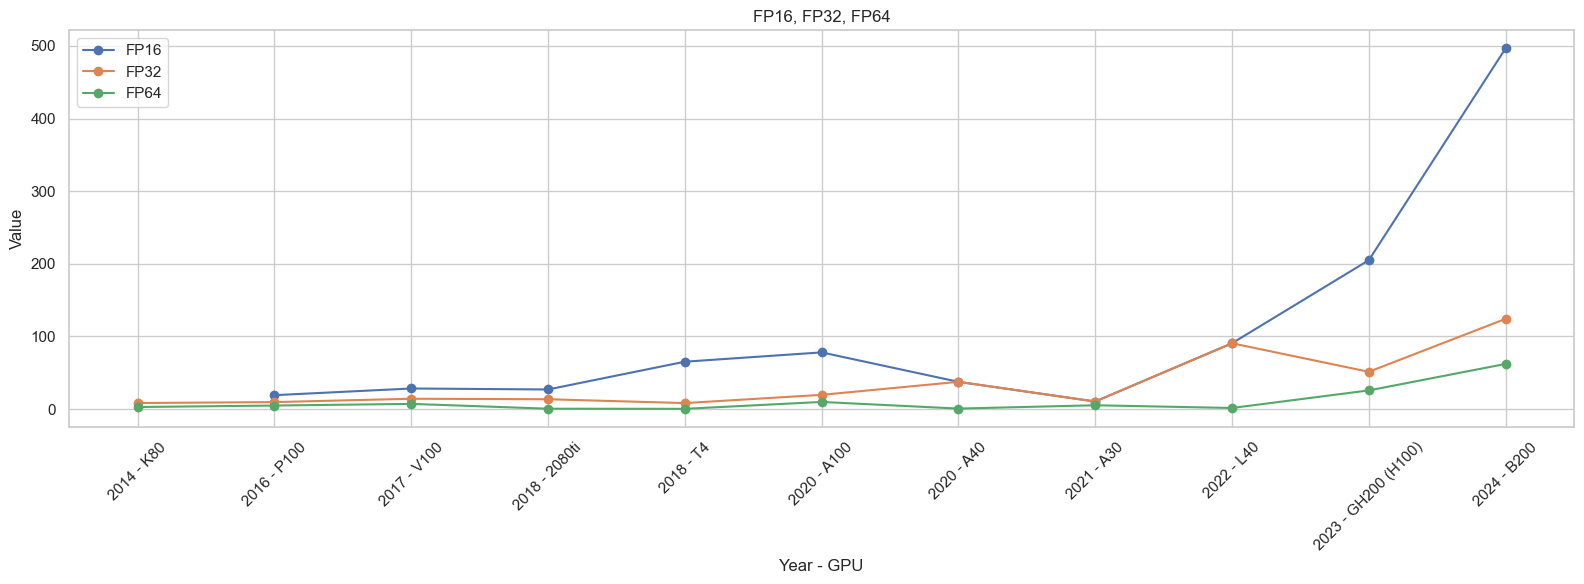

In [ ]:
plt.figure(figsize=(16, 6))

# Plot each FP precision line
plt.plot(df_sorted["LABEL"], df_sorted["FP16"], marker='o', label="FP16")
plt.plot(df_sorted["LABEL"], df_sorted["FP32"], marker='o', label="FP32")
plt.plot(df_sorted["LABEL"], df_sorted["FP64"], marker='o', label="FP64")

plt.xticks(rotation=45)
plt.xlabel("Year - GPU")
plt.ylabel("Value")
plt.title("FP16, FP32, FP64")
plt.legend()
# plt.yscale('log')
plt.tight_layout()
plt.show()